In [6]:
import pandas as pd
import numpy as np
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
##gets the data into a dataset
##also puts the data into a dataset of only pools, no splash parks
poolData = pd.read_csv('PghPools.csv')
query_mask = poolData['type'] == "Pool"
only_pools = poolData[query_mask]
only_pools

,id,name,type,retired,water_source,capacity,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,899591542,Ammon,Pool,NaN,Pittsburgh Water and Sewer Authority,538000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.448720,-79.978325
1,1003800828,Banksville,Pool,NaN,Pennsylvania American Water,166320.0,https://tools.wprdc.org/images/pittsburgh/pool...,Banksville,2,20,42003202300,5,20,6,4-9,40.414758,-80.040551
3,1533382756,Bloomfield,Pool,NaN,Pittsburgh Water and Sewer Authority,335000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Bloomfield,7,8,42003080200,2,8,5,3-1,40.461989,-79.953310
7,1475037865,Highland - Children,Pool,NaN,Pittsburgh Water and Sewer Authority,NaN,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482011,-79.911280
8,5446687,Highland - Main,Pool,NaN,Pittsburgh Water and Sewer Authority,560242.0,https://tools.wprdc.org/images/pittsburgh/pool...,Highland Park,7,11,42003980100,2,11,5,3-9,40.482170,-79.910927
9,878134116,Homewood,Pool,NaN,Pittsburgh Water and Sewer Authority,171075.0,https://tools.wprdc.org/images/pittsburgh/pool...,Homewood South,9,13,42003130300,2,13,5,3-17,40.454310,-79.899891
10,2092220498,Jack Stack,Pool,NaN,Pittsburgh Water and Sewer Authority,205800.0,https://tools.wprdc.org/images/pittsburgh/pool...,Brighton Heights,1,27,42003270800,1,27,1,1-14,40.486884,-80.030632
11,778775283,Magee,Pool,NaN,Pittsburgh Water and Sewer Authority,195000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Greenfield,5,15,42003151700,3,15,4,2-15,40.424814,-79.937006
12,23531050,McBride,Pool,NaN,Pennsylvania American Water,18000.0,https://tools.wprdc.org/images/pittsburgh/pool...,Lincoln Place,5,31,42003310200,3,31,4,4-20,40.370392,-79.907340
14,2077053611,Moore,Pool,NaN,Pennsylvania American Water,417657.0,https://tools.wprdc.org/images/pittsburgh/pool...,Brookline,4,19,42003191700,5,19,6,4-26,40.405583,-80.013514


In [8]:
only_pools['name']

0                   Ammon
1              Banksville
3              Bloomfield
7     Highland - Children
8         Highland - Main
9                Homewood
10             Jack Stack
11                  Magee
12                McBride
14                  Moore
15                 Oliver
16                 Ormsby
17        Phillips - Main
18                   Ream
19              Riverview
20               Schenley
21               Sheraden
22             Sue Murray
24              West Penn
25               Westwood
Name: name, dtype: object

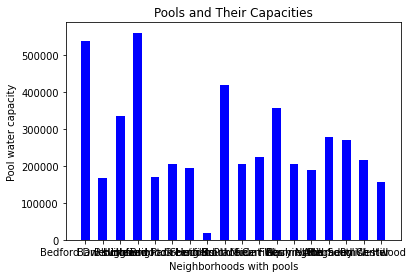

In [9]:
plt.bar(only_pools['neighborhood'], only_pools['capacity'], color = 'blue', width = 0.5)
plt.xlabel("Neighborhoods with pools")
plt.ylabel("Pool water capacity")
plt.title("Pools and Their Capacities")
plt.show()

In [20]:
cap_pools = only_pools.groupby("neighborhood").sum()['capacity']
neighborhood = gp.read_file("Neighborhoods/Neighborhoods_.shp")
pool_map = neighborhood.merge(cap_pools, how = 'left', left_on='hood', right_on='neighborhood')

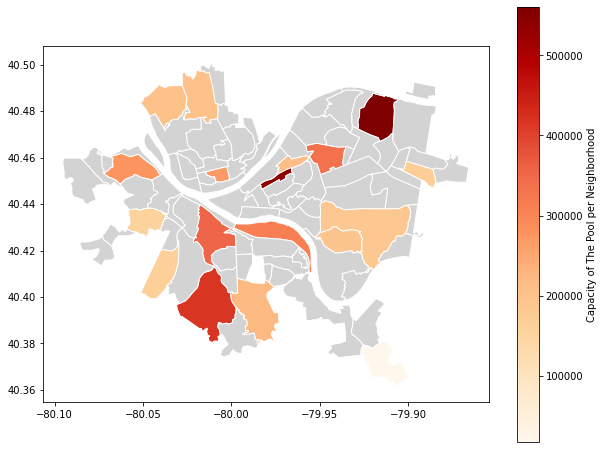

In [23]:
pool_map.plot(column='capacity',
                cmap='OrRd',
                edgecolor="white",
                legend=True,
                legend_kwds={'label': "Capacity of The Pool per Neighborhood"},
                figsize=(10,8),
                missing_kwds={"color": "lightgrey"}
               )

In [34]:
print("The pool with the greatest capacity is in " + only_pools.loc[8, 'neighborhood'] + "and it is called " + only_pools.loc[8, 'name'])
print("The pool with the second greatest capacity is in " + only_pools.loc[0, 'neighborhood'] + "and it is called " + only_pools.loc[0, 'name'])
print("The pool with the third greatest capacity is in " + only_pools.loc[14, 'neighborhood'] + "and it is called " + only_pools.loc[14, 'name'])

The pool with the greatest capacity is in Highland Parkand it is called Highland - Main
The pool with the second greatest capacity is in Bedford Dwellingsand it is called Ammon
The pool with the third greatest capacity is in Brooklineand it is called Moore


# Dom's Conclusion
The metric I used was the water capacity of pools in the Pittsburgh area. I chose the capacity because there is usually one pool per neighborhood and in order to compare how large the pools are, I needed to use the capacity. A higher capacity means more people at a time are in the pool and on their way to becoming multi-sport athletes. The pool with the largest capacity is Highland - Main in Highland Park. The pool with the second largest capacity is Ammon pool in Bedford Dwellings, and the pool with the third largest capacity is Moore pool in Brookline.
